# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

### Business Context
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


### Objective
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?
 

### Data Dictionary
The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

user_id - Unique user ID of the person visiting the website

group - Whether the user belongs to the first group (control) or the second group (treatment)

landing_page - Whether the landing page is new or old

time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

converted - Whether the user gets converted to a subscriber of the news portal or not

language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [1]:
import numpy as np #library used for working with arrays
import pandas as pd #library used for data manipulation and analysis
import matplotlib.pyplot as plt #library for plots and visualization
import seaborn as sns #library for visualization
%matplotlib inline 

import scipy.stats as stats #library for probability distributions and statistical functions.

## Reading the Data into a DataFrame

We read the csv file and create a copy of the original dataframe. This will be our working copy. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/My Drive/PGDSBA/abtest.csv')
df = data.copy()

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [4]:
df.head() #displays first 5 rows of the dataframe

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


From the df.head(), we see that the dataframe is loaded properly.

In [5]:
df.tail() #displays last 5 rows of the dataframe

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [6]:
df.shape  #gives the number of rows and columns in the dataframe

(100, 6)

There are 100 rows and 6 columns in the dataframe.

In [7]:
df.info() #displays the datatypes of the columns in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


* There are 2 numerical type columns and 4 categorical type columns.
* `user_id` is of int64 data type, `time_spent_on_the_page` is of float data type.
* `group`, `landing_page`, `converted` and `language_preferred` are of object data type.

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* There are two unique values for `group`.
* There are two unique values for `landing_page`.
* The average `time_spent_on_the_page` is about 5.38 mins, the minimun being 0.19 mins and the maximum being 10.71 mins.
* There are two unique values for `converted`, and 54% people have converted to a subscriber of the news portal.
* There are three unique values for `language_preferred`.

In [9]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There are no missing values in the data.

`user_id` should be unique.
We check the number of unique values in `user_id` to verify there are no duplicates.

In [10]:
df['user_id'].nunique()

100

### Univariate Analysis

1. Analysis on the `user_id`

In [11]:
df['user_id'].nunique() #check that user_ids are unique to avoid duplicates

100

There are 100 unique users.

2. Analysis on the `group`

In [12]:
df['group'].unique()

array(['control', 'treatment'], dtype=object)

There are two unique values for `group`, viz. control and treatment.

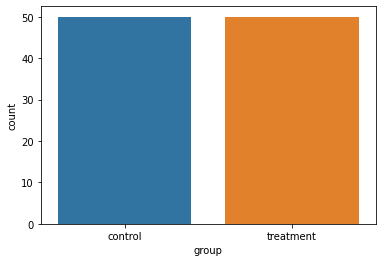

In [13]:
sns.countplot(data=df, x=df['group']);
plt.show()

The 100 randomly selected users are divided equally into two groups, 50 in control group and 50 in treatment group.

3. Analysis on the `landing_page`

In [14]:
df['landing_page'].unique()

array(['old', 'new'], dtype=object)

There are two unique values for `landing_page`, viz. old and new.

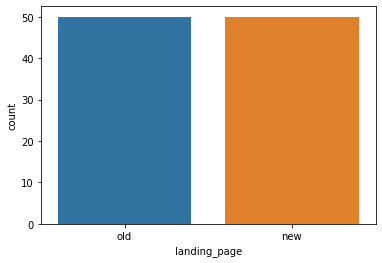

In [15]:
sns.countplot(data=df, x=df['landing_page']);
plt.show()

50 people in control group were served the old landing page and the remaining 50 in treatment group were served the new landing page.

4. Analysis on the `time_spent_on_the_page`

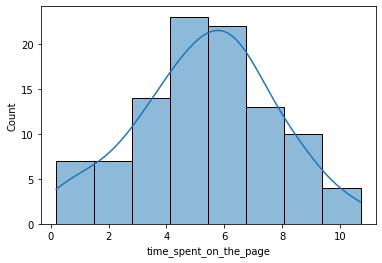

In [16]:
sns.histplot(data=df, x=df['time_spent_on_the_page'], kde=True);
plt.show()

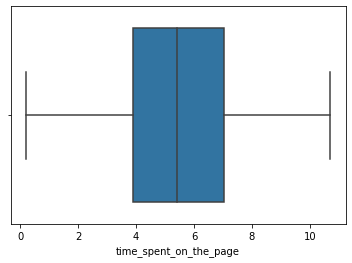

In [17]:
sns.boxplot(data=df, x=df['time_spent_on_the_page']);
plt.show()

* The boxplot of `time_spent_on_the_page` looks symmetrical.
* The distribution of `time_spent_on_the_page` looks similar to normal distribution.


5. Analysis on `converted`

In [18]:
df['converted'].unique()

array(['no', 'yes'], dtype=object)

There are two unique values for `converted`, viz. yes and no.

In [19]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

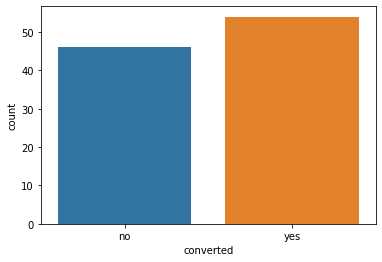

In [20]:
sns.countplot(data=df, x=df['converted']);
plt.show()

54% users got converted to a subscriber of the news portal.

6. Analysis on the `language_preferred`

In [21]:
df['language_preferred'].unique()

array(['Spanish', 'English', 'French'], dtype=object)

In [22]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

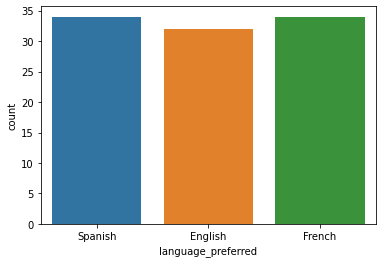

In [23]:
sns.countplot(data=df, x=df['language_preferred']);
plt.show()

* Equal number of users have chosen Spanish and French as the language to view the landing page, 34.
* These are followed by English, chosen by 32 users.

### Bivariate Analysis

1. Analysing `landing_page` vs `time_spent_on_the_page`

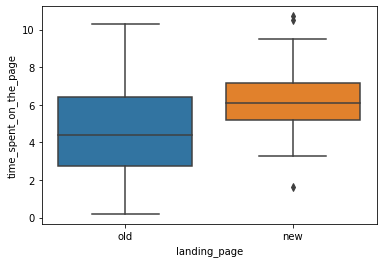

In [24]:
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page');
plt.show()

In [25]:
# time spent on old landing page
df[df['landing_page']=='old']['time_spent_on_the_page'].median()

4.38

In [26]:
# time spent on new landing page
df[df['landing_page']=='new']['time_spent_on_the_page'].median()

6.105

* Median value of `time_spent_on_the_page` for the new landing page is greater than that of the old landing page.
* The boxplot for `time_spent_on_the_page` for new landing page has outliers.


2. Analysing `landing_page` vs `converted`

In [27]:
df[df['landing_page']=='old']['converted'].value_counts()

no     29
yes    21
Name: converted, dtype: int64

In [28]:
df[df['landing_page']=='new']['converted'].value_counts()

yes    33
no     17
Name: converted, dtype: int64

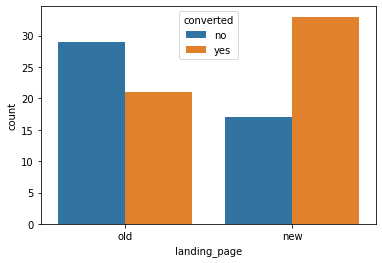

In [29]:
sns.countplot(data=df, x=df['landing_page'], hue=df['converted']);
plt.show()

* 66% of users landing on the new page get converted to a subscriber of the news portal.
* Only 42% of users landing on the old page get converted to a subscriber.

3. Analysing `language_preferred` vs `converted`

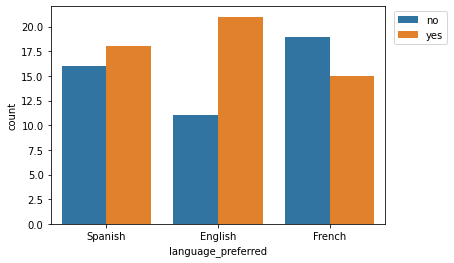

In [30]:
sns.countplot(data=df, x=df['language_preferred'], hue=df['converted']);
plt.legend(loc='best', bbox_to_anchor=(0.7, 0.5, 0.5, 0.5))
plt.show()

* More users viewing the landing page in English are getting converted to subscribers, followed by Spanish.
* Users viewing the landing page in French are not getting converted.
* There is only a small difference in the conversion rates for users viewing the landing page in Spanish.

4. Analysing `time_spent_on_the_page` vs `converted`

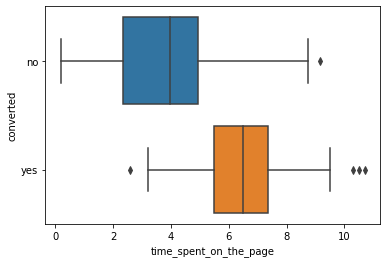

In [31]:
sns.boxplot(data=df, x=df['time_spent_on_the_page'], y='converted');
plt.show()

* Conversion rate increases with increased time spent on the page.
* Median value of time spent is about 6.4 mins for successful conversion.
* Median value of time spent by users and not getting converted is about 3.8 mins.
* The boxplot shows some outliers too.

5. Analysing `time_spent_on_the_page` on the old landing page for different `language_preferred`

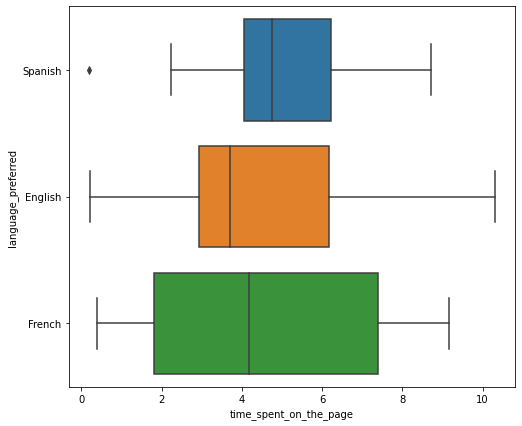

In [32]:
plt.figure(figsize=[8,7])
sns.boxplot(data=df, x=df[df['landing_page']=='old']['time_spent_on_the_page'], y='language_preferred');
plt.show()

* Median value of time spent on the old landing page viewed in Spanish language, approx. 4.8 mins. is the highest. The boxplot has outliers too.
* Spanish is followed by French, with median value of approx. 4.2 mins.
* Median value of time spent on the old landing page is comparatively lower for English(approx. 3.6 mins.).

6. Analysing `time_spent_on_the_page` on the new landing page for different `language_preferred`

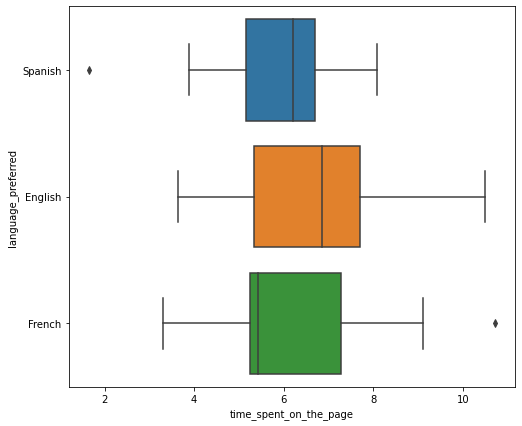

In [33]:
plt.figure(figsize=[8,7])
sns.boxplot(data=df, x=df[df['landing_page']=='new']['time_spent_on_the_page'], y='language_preferred');
plt.show()

* Median value for time spent on the new landing page viewed in different languages has increased.
* For Spanish language, the median is about 6.4 mins. The boxplot shows some outliers.
* Meian value for time spent on the new landing page viewed in French too has improved too (approx. 5.4 mins.).
* Median value for time spent on the new landing page viewed in English is the highest(approx. 7.2 mins.).

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

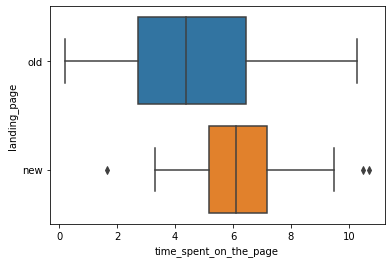

In [34]:
sns.boxplot(data=df, x=df['time_spent_on_the_page'], y='landing_page');
plt.show()

* From the visual analysis, `time_spent_on_the_page` for the new landing page is greater than that of the old landing page.
* The boxplot for `time_spent_on_the_page` for new landing page has outliers.

### Step 1: Define the null and alternate hypotheses

* Null Hypothesis, Ho : μ1=μ2, Time spent on the new landing page is same as the old landing page. 
* Alternate Hypothesis, Ha : μ1>μ2, Time spent on the new landing page is greater than the old landing page. (One-sided hypothesis)

μ1- Average time spent on new landing page
μ2- Average time spent on old landing page


### Step 2: Select Appropriate test

In [35]:
# calculating mean for time_spent_on_the_page, given landing_page is new
M1 = df[df['landing_page'] == 'new']['time_spent_on_the_page'].mean()
# calculating mean for time_spent_on_the_page, given landing_page is old
M2 = df[df['landing_page'] == 'old']['time_spent_on_the_page'].mean()
# calculating std deviation for time_spent_on_the_page, given landing_page is new
S1 = df[df['landing_page'] == 'new']['time_spent_on_the_page'].std()
# calculating std deviation for time_spent_on_the_page, given landing_page is old
S2 = df[df['landing_page'] == 'old']['time_spent_on_the_page'].std()
print("Mean for time_spent_on_the_page, given landing_page is new, in mins. " , round(M1, 2))
print("Mean for time_spent_on_the_page, given landing_page is old, in mins. " , round(M2, 2))
print("Std Deviation for time_spent_on_the_page, given landing_page is new, in mins. " , round(S1, 2))
print("Std Deviation for time_spent_on_the_page, given landing_page is old, in mins. " , round(S2, 2))

Mean for time_spent_on_the_page, given landing_page is new, in mins.  6.22
Mean for time_spent_on_the_page, given landing_page is old, in mins.  4.53
Std Deviation for time_spent_on_the_page, given landing_page is new, in mins.  1.82
Std Deviation for time_spent_on_the_page, given landing_page is old, in mins.  2.58


* We have 2 samples, for which mean can be calculated. 
* The samples are from 2 independent populations. 
* Standard deviations are unequal. Hence, we assume the population standard deviations may be different.
* Continuous data, normally distributed populations, random sampling from the population.
* Hence, we choose 2-sample independent t-test.

### Step 3: Decide the significance level

Here, we select Significance level, α= 0.05

### Step 4: Collect and prepare data

In [36]:
time_spent_on_new_page = np.array(df[df['landing_page'] == 'new']['time_spent_on_the_page'])
time_spent_on_old_page = np.array(df[df['landing_page'] == 'old']['time_spent_on_the_page'])

### Step 5: Calculate the p-value

In [38]:
#checking scipy version aand upgrading
import scipy
scipy.__version__


'1.4.1'

In [39]:
!pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 38.1 MB 58.6 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [37]:
from scipy.stats import ttest_ind
test_statistic, p_value = ttest_ind(time_spent_on_new_page, time_spent_on_old_page, equal_var=False, alternative='greater')
print(round(p_value, 4))

0.0001


### Step 6: Compare the p-value with $\alpha$

In [38]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p_value is <0.05, we reject the null hypothesis. Hence, we have enough statistical evidence to say that time spent on the new landing page is greater than the old landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

In [39]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

In [40]:
df[df['landing_page']=='old']['converted'].value_counts()

no     29
yes    21
Name: converted, dtype: int64

In [41]:
df[df['landing_page']=='new']['converted'].value_counts()

yes    33
no     17
Name: converted, dtype: int64

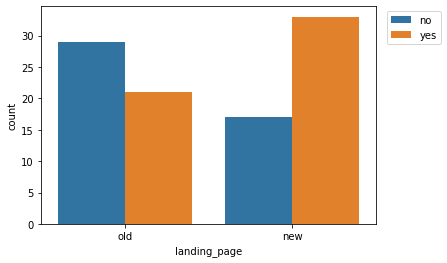

In [42]:
sns.countplot(data=df, x=df['landing_page'], hue='converted');
plt.legend(loc='best', bbox_to_anchor=(1.02, 1))
plt.show()

* From the visual analysis, conversion rate for the new landing page is greater than that of the old landing page.

### Step 1: Define the null and alternate hypotheses

* Null Hypothesis, Ho : P1=P2, The proportion of users who visit the new landing page and get converted is same as that for the old landing page. 
* Alternate Hypothesis, Ha : P1≠P2, The proportion of users who visit the new landing page and get converted is greater than that for the old landing page.

### Step 2: Select Appropriate test

* We have two population proportions from two independent populations.
* This is a one-tailed test.
* Random sampling from the population.
* Hence, we use the 2-proportion Z-test.

### Step 3: Decide the significance level

Here, we select Significance level, α= 0.05

### Step 4: Collect and prepare data

In [43]:
# set the counts of users who got converted for new and old landing pages
converted_count = np.array([df[df['landing_page']=='new']['converted'].value_counts()['yes'], 
                            df[df['landing_page']=='old']['converted'].value_counts()['yes']])

# set the sample sizes for new and old pages
nobs = np.array([df['landing_page'].value_counts()['new'], df['landing_page'].value_counts()['old']])

### Step 5: Calculate the p-value

In [44]:
from statsmodels.stats.proportion import proportions_ztest

test_statistic, p_value = proportions_ztest(converted_count, nobs, alternative='larger')
print(p_value)

0.008026308204056278


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Step 6: Compare the p-value with $\alpha$

In [45]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p_value is <0.05, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the proportion of users who visit the new landing page and get converted is greater than that for the old landing page.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

In [46]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

In [47]:
df[df['converted']=='yes']['language_preferred'].value_counts()

English    21
Spanish    18
French     15
Name: language_preferred, dtype: int64

In [48]:
df[df['converted']=='no']['language_preferred'].value_counts()

French     19
Spanish    16
English    11
Name: language_preferred, dtype: int64

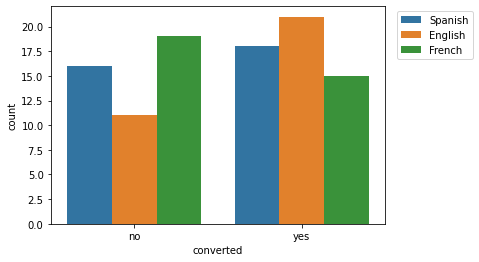

In [49]:
sns.countplot(data=df, x=df['converted'], hue='language_preferred');
plt.legend(loc='best', bbox_to_anchor=(1.02, 1))
plt.show()

* From the visual analysis, more users viewing the landing page in English have converted to subscriber, followed by Spanish.
* However, the number of users viewing the landing page in French getting converted to subscriber is lesser.

### Step 1: Define the null and alternate hypotheses

* Null Hypothesis, Ho : Conversion rate is independent of the preferred language. 
* Alternate Hypothesis, Ha : Conversion rate is dependent on the preferred language.

### Step 2: Select Appropriate test

* Conversion rate and language preferred are categorical variables.
* Expected value of the number of sample observations in each level of the variable is at least 5.
* Random sampling from the population.
* Hence, we use Chi-square test of independence of attributes.

### Step 3: Decide the significance level

Here, we select Significance level, α= 0.05

### Step 4: Collect and prepare data

In [50]:
# create contingency table
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])
print(contingency_table)

language_preferred  English  French  Spanish
converted                                   
no                       11      19       16
yes                      21      15       18


### Step 5: Calculate the p-value

In [51]:
from scipy.stats import chi2_contingency
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)
print(round(p_value, 4))

0.213


### Step 6: Compare the p-value with $\alpha$

In [52]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since the p_value is >0.05, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that conversion rate is independent of the language preferred.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

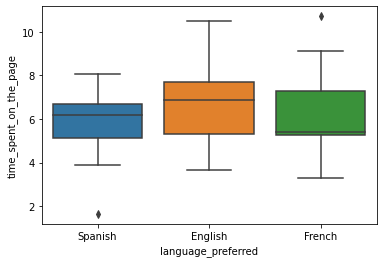

In [53]:
sns.boxplot(data=df, x='language_preferred', y=df[df['landing_page']=='new']['time_spent_on_the_page']);
plt.show()

* From the visual analysis, for the new landing page, the time spent differs for different languages.
* The boxplot shows some outliers too.

### Step 1: Define the null and alternate hypotheses

If  μ1,μ2,μ3  are the mean values of time spent for languages Spanish, English and French respectively,

* Null Hypothesis, Ho : μ1=μ2=μ3, Mean values of time spent on the new page is same for different languages preferred.
* Alternate Hypothesis, Ha : Atleast one mean value of time spent on the new page is different from the rest.

### Step 2: Select Appropriate test

* To determine whether the means of more than 2 independent populations are significantly different, we use the one-way ANOVA test.

### Step 3: Decide the significance level

Here, we select Significance level, α= 0.05

### Step 4: Collect and prepare data

In [54]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

In [55]:
# calculating the mean values of time spent for different languages
df_new = df[df['landing_page']=='new']
Ms = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page'].mean()
Me = df_new[df_new['language_preferred']=='English']['time_spent_on_the_page'].mean()
Mf = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page'].mean()
print('Mean value of time spent on the new page in Spanish language is ', round(Ms,4))
print('Mean value of time spent on the new page in English language is ', round(Me,4))
print('Mean value of time spent on the new page in French language is ', round(Mf,4))

Mean value of time spent on the new page in Spanish language is  5.8353
Mean value of time spent on the new page in English language is  6.6638
Mean value of time spent on the new page in French language is  6.1965


* The normality and equality of variance assumptions need to be checked.
* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.
* For equality of variance, Levene test is applied to the response variable.

### *Shapiro-Wilk’s test*
We test the null hypothesis, Ho:  Time spent follows a normal distribution 

against the alternative hypothesis

Ha:  Time spent does not follow a normal distribution

In [56]:
# calculate p_value for Shapiro Wilk's test
from scipy import stats
test_statistic, p_value = stats.shapiro(df['time_spent_on_the_page'])
print(p_value)

0.5643684267997742


In [57]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.5643684267997742 is greater than the level of significance, we fail to reject the null hypothesis.


Since the p_value is >0.05, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that time spent follows a normal distribution.

### *Levene’s test*
We test the null hypothesis

Ho : All the population variances are equal

against the alternative hypothesis

Ha : At least one variance is different from the rest

In [58]:
from scipy.stats import levene
df_new = df[df['landing_page']=='new']
test_statistic, p_value = levene(df_new[df_new['language_preferred'] == 'Spanish']['time_spent_on_the_page'],
                                 df_new[df_new['language_preferred'] == 'English']['time_spent_on_the_page'],
                                 df_new[df_new['language_preferred'] == 'French']['time_spent_on_the_page']
                                 )
print(p_value)

0.46711357711340173


In [59]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.46711357711340173 is greater than the level of significance, we fail to reject the null hypothesis.


Since the p_value is >0.05, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the population variances are same.


Checking if the assumptions were followed,

* The populations are normally distributed - verified using the Shapiro-Wilk’s test.
* Given that the samples are independent simple random samples.
* Population variances are equal - verified using the Levene's test.

### Step 5: Calculate the p-value

In [60]:
from scipy.stats import f_oneway
test_statistic, p_value = f_oneway(df_new.loc[df_new['language_preferred']=='Spanish', 'time_spent_on_the_page'],
                                   df_new.loc[df_new['language_preferred']=='English', 'time_spent_on_the_page'],
                                   df_new.loc[df_new['language_preferred']=='French', 'time_spent_on_the_page']
                                   )
print(p_value)

0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [61]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since the p_value is >0.05, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that Mean values of time spent on the new page is same for different languages preferred.

* Analysing using Multiple Comparison Test(Tukey HSD)

Ho:μ1=μ2 and μ1=μ3 and μ2=μ3 

against the alternative hypothesis

Ha:μ1≠μ2 or μ1≠μ3 or μ2≠μ3

where, μ1 - Mean value of time spent on the new page in Spanish, 
μ2 - Mean value of time spent on the new page in English, 
μ3 - Mean value of time spent on the new page in French

In [62]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m_comp = pairwise_tukeyhsd(endog=df_new['time_spent_on_the_page'], groups=df_new['language_preferred'], alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
English  French  -0.4673 0.7259 -2.0035  1.069  False
English Spanish  -0.8285  0.401 -2.3647 0.7078  False
 French Spanish  -0.3612  0.816  -1.874 1.1516  False
-----------------------------------------------------


As the p-values for comparing the time spent on new landing page for all pairs of languages are greater than the significance level, we fail to reject the null hypothesis of equality of all population means.


## Conclusion and Business Recommendations

*We analysed the data shared by E-News Express. We obtained some interesting results, which would help the company expand its business.*

### Conclusions:
* *Users spent an average of about 5.38 mins. on the online news portal.*
* *Conversion rate increased with increased time spent on the page.*
* *54% of the total users got converted to a subscriber of the news portal.*
* *66% of users landing on the new page and 42% of users landing on the old page got converted to a subscriber.*
* *Time spent on the new landing page is greater than the old landing page.*
* *Mean values of time spent on the new page is same for different languages preferred.*
* *Conversion rate is independent of the language preferred.*



### Recommendations:

* *Conversion rate increased with increased time spent on the page. This can be furthermore increased by including the best news articles on the landing page.*
* *The new landing page has better chances of increasing the customer base. The company can focus on improving and slowly switching to the new page.*
* *The company can come up with better UI design for the online platform to ensure easy access to news. It could be made visually appealing.*
* *The online portal can also try to cater to differently-abled users, who can listen to the news on the portal.*
* *Special promotional offers can be designed to attract visitors to the portal. One-time offers can be provided to the existing clients.*

___